Solving angeli with Julia

In [1]:
## ecuaciones diferenciales

# Pkg.add("DifferentialEquations") # this has to be called only once - takes some time

In [3]:
# Pkg.add("PyDSTool") #has to be called only once - takes some time 

In [3]:
# también usaremos esto
using PyDSTool;

Info: Installing PyDSTool via the Conda pydstool package...


Solving environment: ...working... done

# All requested packages already installed.



In [2]:
# carga la paquetería que vamos a usar
using DifferentialEquations;

Specifiy the model 


In [6]:
f = @ode_def Angeli begin
  dx1 = alpha1*(1-x1)-beta1*x1*(v*y1)^gamma1/(K1+(v*y1)^gamma1)
  dy1 = alpha2*(1-y1)-beta2*y1*(x1)^gamma2/(K2+(x1)^gamma2)
end alpha1 alpha2 beta1 beta2 gamma1 gamma2 K1 K2 v

(::Angeli) (generic function with 9 methods)

In [7]:
u0 = [0;1] # initial condition
tspan = [0;30] # integration time
p = [1, 1, 200, 10, 4, 4, 30, 1, 1]; # vector of parameters

In [8]:
dsargs = build_ode(f,u0,tspan,p);
#command to build the ODE with python tools; given the function, initial conditions, integration time and parameters

PyObject args (
 ics = {'y1': 1, 'x1': 0},
 varspecs = {'y1': 'alpha2 * (1 - y1) - (beta2 * y1 * x1 ^ gamma2) / (K2 + x1 ^ gamma2)', 'x1': 'alpha1 * (1 - x1) - (beta1 * x1 * (v * y1) ^ gamma1) / (K1 + (v * y1) ^ gamma1)'},
 pars = {'alpha2': 1, 'alpha1': 1, 'gamma2': 4, 'gamma1': 4, 'K2': 1, 'K1': 30, 'beta2': 10, 'beta1': 200, 'v': 1},
 name = Angeli,
 tdomain = [ 0 30]
)

In [9]:
ode = ds[:Generator][:Vode_ODEsystem](dsargs)
ode[:set](pars = Dict("v"=>0)) #initialize with a parametr (the initial value of the bifurcation parameter)
ode[:set](ics  = Dict("y1"=>0)) # initial condition: close to a steady state
PC = ds[:ContClass](ode)

PyObject ContClass of model Angeli

In [10]:
bif = bifurcation_curve(PC,"EP-C",["v"],
                        max_num_points=450,
                        max_stepsize=0.001,min_stepsize=1e-5,
                        stepsize=2e-2,loc_bif_points="all",
                        save_eigen=true,name="EQ1",
                        print_info=true,calc_stab=true);

his returns a BifurcationCurve type. Important fields of this type are:

    points: the values along the curve

    special_points: the values for the bifurcation points

    stab: an array which gives the stability of each point along the curve. "S" is for stable, N is for neutral, and U is for unstable.

In [13]:
    #bif.points.vals[3]

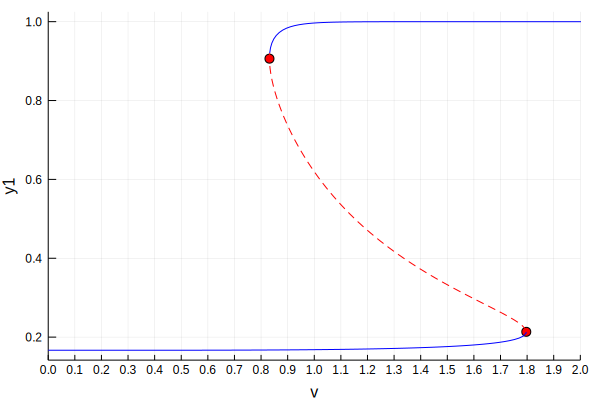

In [11]:
using Plots
plot(bif,(:v,:y1))
plot!(xlims=(0,2),xticks=0:0.1:2)

INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of PyPlot from https://github.com/JuliaPy/PyPlot.jl.git
INFO: Installing LaTeXStrings v0.3.0
INFO: Installing PyPlot v2.5.0
INFO: Building Conda
INFO: Building PyCall


Solving environment: ...working... done

# All requested packages already installed.



Info: PyCall is using C:\Users\Elisa\.julia\v0.6\Conda\deps\usr\python.exe (Python 2.7.15) at C:\Users\Elisa\.julia\v0.6\Conda\deps\usr\python.exe, libpython = C:\Users\Elisa\.julia\v0.6\Conda\deps\usr\python27
Info: C:\Users\Elisa\.julia\v0.6\PyCall\deps\deps.jl has not changed
Info: C:\Users\Elisa\.julia\v0.6\PyCall\deps\PYTHON has not changed
INFO: Package database updated


INFO: Cloning cache of AxisAlgorithms from https://github.com/timholy/AxisAlgorithms.jl.git
INFO: Cloning cache of CategoricalArrays from https://github.com/JuliaData/CategoricalArrays.jl.git
INFO: Cloning cache of CodecZlib from https://github.com/bicycle1885/CodecZlib.jl.git
INFO: Cloning cache of Compose from https://github.com/GiovineItalia/Compose.jl.git
